In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.compose import ColumnTransformer

In [6]:
from sklearn.preprocessing import Normalizer

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.compose import make_column_transformer

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
import pickle

In [13]:
data=pd.read_csv(r"F:\Project\Physical activity Fitness prediction using IBM Watson\dataset\25.csv")

In [14]:
data.head()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66


In [15]:
data.tail()

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,500,64
94,2018-01-08,2127,200,0,5,0,64
95,2018-01-09,2203,300,0,5,500,64


In [16]:
data.head(8)

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66
5,2017-10-11,4545,100,149,6,0,66
6,2017-10-12,4340,100,140,6,0,66
7,2017-10-13,1230,100,38,7,0,66


In [17]:
data.columns

Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null     int64 
 6   weight_kg        96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [19]:
data.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2935.937500,211.458333,93.447917,5.21875,218.750000,64.281250
std,2143.384573,84.442184,71.601951,1.51625,249.341237,0.627495
min,25.000000,100.000000,0.000000,2.00000,0.000000,64.000000
25%,741.000000,100.000000,21.750000,4.00000,0.000000,64.000000
50%,2987.500000,200.000000,96.000000,5.00000,0.000000,64.000000
75%,4546.250000,300.000000,149.250000,6.00000,500.000000,64.000000
max,7422.000000,300.000000,243.000000,9.00000,500.000000,66.000000


In [20]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('O')], dtype=object), array([6, 1], dtype=int64))

In [21]:
def category(data):
  for i in data.columns:
        print(i)
        print(data[i].unique())
        print("x"*90)
category(data)        

date
['2017-10-06' '2017-10-07' '2017-10-08' '2017-10-09' '2017-10-10'
 '2017-10-11' '2017-10-12' '2017-10-13' '2017-10-14' '2017-10-15'
 '2017-10-16' '2017-10-17' '2017-10-18' '2017-10-19' '2017-10-20'
 '2017-10-21' '2017-10-22' '2017-10-23' '2017-10-24' '2017-10-25'
 '2017-10-26' '2017-10-27' '2017-10-28' '2017-10-29' '2017-10-30'
 '2017-10-31' '2017-11-01' '2017-11-02' '2017-11-03' '2017-11-04'
 '2017-11-05' '2017-11-06' '2017-11-07' '2017-11-08' '2017-11-09'
 '2017-11-10' '2017-11-11' '2017-11-12' '2017-11-13' '2017-11-14'
 '2017-11-15' '2017-11-16' '2017-11-17' '2017-11-18' '2017-11-19'
 '2017-11-20' '2017-11-21' '2017-11-22' '2017-11-23' '2017-11-24'
 '2017-11-25' '2017-11-26' '2017-11-27' '2017-11-28' '2017-11-29'
 '2017-11-30' '2017-12-01' '2017-12-02' '2017-12-03' '2017-12-04'
 '2017-12-05' '2017-12-06' '2017-12-07' '2017-12-08' '2017-12-09'
 '2017-12-10' '2017-12-11' '2017-12-12' '2017-12-13' '2017-12-14'
 '2017-12-15' '2017-12-16' '2017-12-17' '2017-12-18' '2017-12-19'
 '201

In [22]:
data["bool_of_active"].unique()

array([  0, 500], dtype=int64)

In [23]:
data["mood"].unique()

array([200, 100, 300], dtype=int64)

In [24]:
data['weight_kg'].unique()

array([66, 65, 64], dtype=int64)

In [25]:
data['hours_of_sleep'].unique()

array([5, 8, 4, 6, 7, 3, 2, 9], dtype=int64)

In [26]:
data.corr()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.246738,0.989260,0.080687,0.120212,0.109404
mood,0.246738,1.000000,0.235044,0.210417,0.379646,-0.458776
calories_burned,0.989260,0.235044,1.000000,0.080726,0.110900,0.112200
hours_of_sleep,0.080687,0.210417,0.080726,1.000000,0.136603,0.189118
bool_of_active,0.120212,0.379646,0.110900,0.136603,1.000000,-0.296443
weight_kg,0.109404,-0.458776,0.112200,0.189118,-0.296443,1.000000


In [27]:
data.isnull().any()

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

In [28]:
data.isnull().sum()

date               0
step_count         0
mood               0
calories_burned    0
hours_of_sleep     0
bool_of_active     0
weight_kg          0
dtype: int64

<AxesSubplot:>

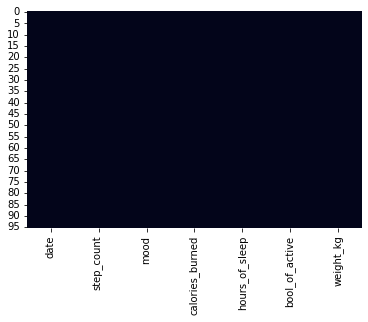

In [29]:
sns.heatmap(data.isnull(),cbar=False)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['bool_of_active']=le.fit_transform(data['bool_of_active'])
data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,1,64
94,2018-01-08,2127,200,0,5,0,64


<AxesSubplot:>

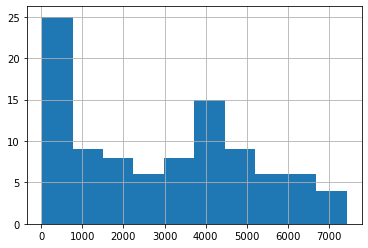

In [31]:
data['step_count'].hist()

<AxesSubplot:>

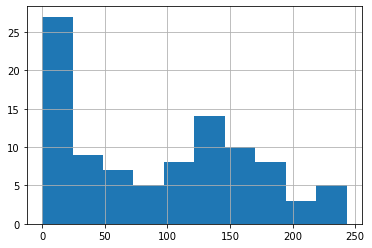

In [32]:
data['calories_burned'].hist()

<AxesSubplot:>

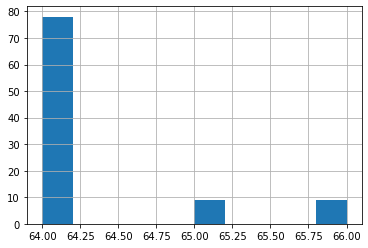

In [33]:
data['weight_kg'].hist()

<AxesSubplot:>

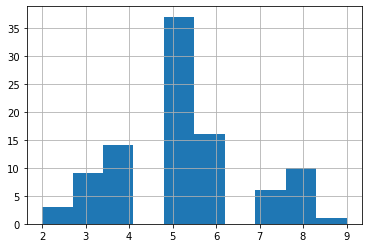

In [34]:
data['hours_of_sleep'].hist()

<AxesSubplot:>

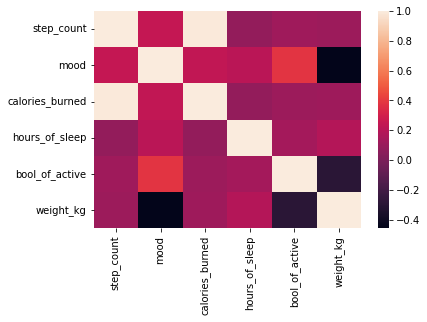

In [35]:
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

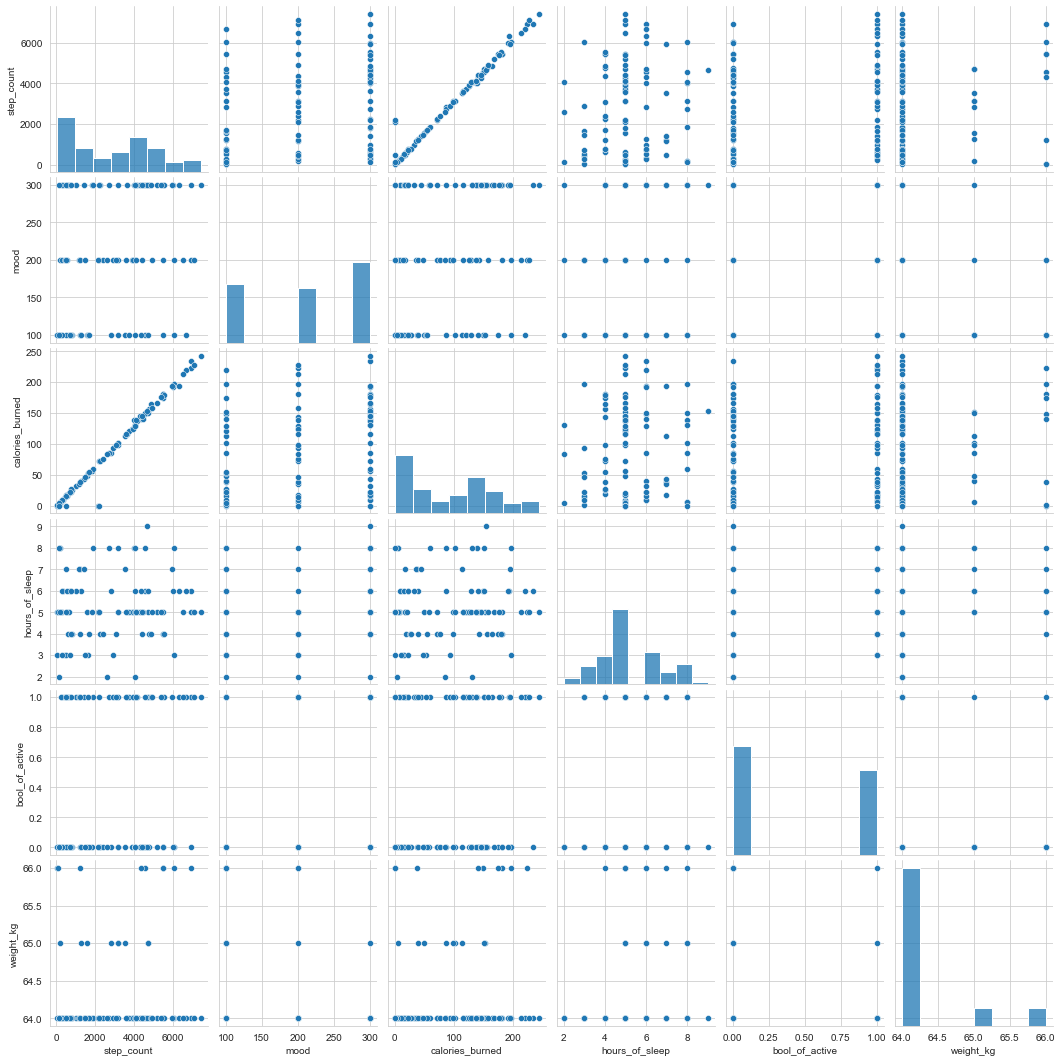

In [36]:
sns.set_style("whitegrid")
sns.pairplot(data)

In [37]:
data['step_count'].groupby(data.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,29.0,2103.068966,2057.012361,25.0,299.0,1258.0,3721.00,6676.0
200,27.0,3153.777778,2091.761446,202.0,1339.0,3066.0,4245.50,7102.0
300,40.0,3392.725000,2115.006540,153.0,1314.5,4048.5,4804.25,7422.0


<Figure size 432x360 with 0 Axes>

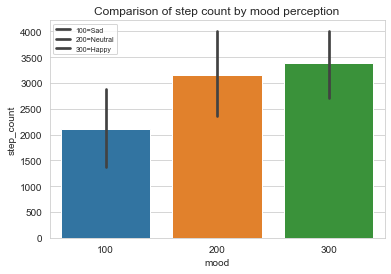

<Figure size 432x360 with 0 Axes>

In [38]:
sns.barplot(x="mood",y="step_count",data=data)
plt.title('Comparison of step count by mood perception')
plt.legend(['100=Sad', '200=Neutral', '300=Happy'], loc='upper left', prop={'size' : 7})
plt.figure(figsize=(6,5))

In [39]:
data.step_count.groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,2709.888889,2059.107323,25.0,663.75,2486.5,4411.5,6930.0
1,42.0,3226.571429,2238.337734,221.0,1037.00,3362.0,4843.0,7422.0


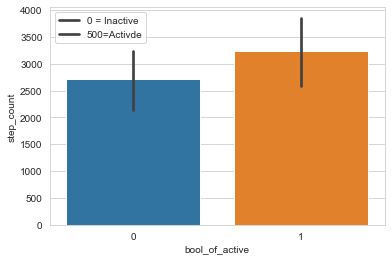

In [40]:
sns.barplot(x='bool_of_active',y="step_count",data=data)
plt.legend(['0 = Inactive','500=Activde'])

In [41]:
data.calories_burned.groupby(data.mood)

<Figure size 432x360 with 0 Axes>

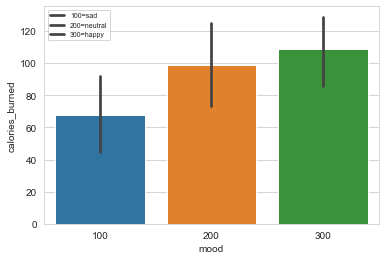

<Figure size 432x360 with 0 Axes>

In [42]:
sns.barplot(x = "mood",y="calories_burned",data=data)
plt.legend(['100=sad','200=neutral','300=happy'],loc='upper left',prop={'size':7})
plt.figure(figsize=(6,5))    

<AxesSubplot:>

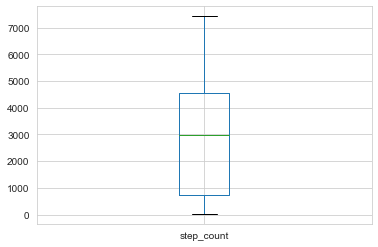

In [43]:
data.boxplot(column="step_count")

<AxesSubplot:>

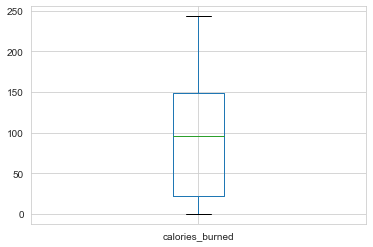

In [44]:
data.boxplot(column="calories_burned")

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['bool_of-active']=le.fit_transform(data['bool_of_active'])
data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg,bool_of-active
0,2017-10-06,5464,200,181,5,0,66,0
1,2017-10-07,6041,100,197,8,0,66,0
2,2017-10-08,25,100,0,5,0,66,0
3,2017-10-09,5461,100,174,4,0,66,0
4,2017-10-10,6915,200,223,5,1,66,1
...,...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64,0
92,2018-01-06,153,300,0,8,0,64,0
93,2018-01-07,500,200,0,5,1,64,1
94,2018-01-08,2127,200,0,5,0,64,0


In [46]:
x=pd.DataFrame(data.iloc[:,[1,2,3,4,6]])
y=pd.DataFrame(data.iloc[:,5])

In [47]:
x.head()

,step_count,mood,calories_burned,hours_of_sleep,weight_kg
0,5464,200,181,5,66
1,6041,100,197,8,66
2,25,100,0,5,66
3,5461,100,174,4,66
4,6915,200,223,5,66


In [48]:
columnTransformer = ColumnTransformer([('encoder',
                                       OneHotEncoder(),
                                       [1])],
                                     remainder='passthrough')

x = pd.DataFrame(columnTransformer.fit_transform(x),
                 dtype = np.str,columns=['sad','neutral','happy','step_count',
                                   'calories_burned','hours_of_sleep','weight_kg'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_6136\1420482195.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.str,columns=['sad','neutral','happy','step_count',


In [49]:
import joblib 

In [50]:
joblib.dump(columnTransformer,"ohe")

['ohe']

In [51]:
x

,sad,neutral,happy,step_count,calories_burned,hours_of_sleep,weight_kg
0,0.0,1.0,0.0,5464.0,181.0,5.0,66.0
1,1.0,0.0,0.0,6041.0,197.0,8.0,66.0
2,1.0,0.0,0.0,25.0,0.0,5.0,66.0
3,1.0,0.0,0.0,5461.0,174.0,4.0,66.0
4,0.0,1.0,0.0,6915.0,223.0,5.0,66.0
...,...,...,...,...,...,...,...
91,1.0,0.0,0.0,133.0,4.0,2.0,64.0
92,0.0,0.0,1.0,153.0,0.0,8.0,64.0
93,0.0,1.0,0.0,500.0,0.0,5.0,64.0
94,0.0,1.0,0.0,2127.0,0.0,5.0,64.0


In [52]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=12)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [54]:
dt_y_train=dtc.predict([['0.0','0.0','1.0','4435.0','141.0','5.0','64.0',]])
dt_y_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [55]:
dtc.score(x_train,y_train)

0.9883720930232558

In [56]:
import pickle
pickle.dump(dtc, open('fitness.pkl','wb'))